# TASK 1 - HOUSE PRICE PREDICTION 

Use a dataset that includes information about
housing prices and features like square
footage, number of bedrooms, etc. to train a
model that can predict the price of a new
house

Importing Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")

Displaying first 5 records from the dataset

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Displaying last 5 records from dataset

In [4]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Many things are inferred using describe function

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Displaying number of rows and columns

In [6]:
data.shape

(21613, 21)

Checking null values

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Checking for duplicate and unique values

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Using bar graph we can infer that 3 bedroom houses are most commonly sold followed by 4 bedroom

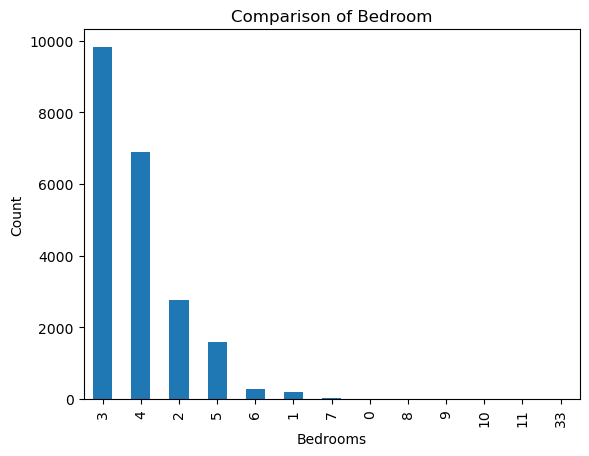

In [10]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Comparison of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine
plt.show()

 Joinplot function is used to see the concentration of houses based on longitude and latitude

<Figure size 1000x1000 with 0 Axes>

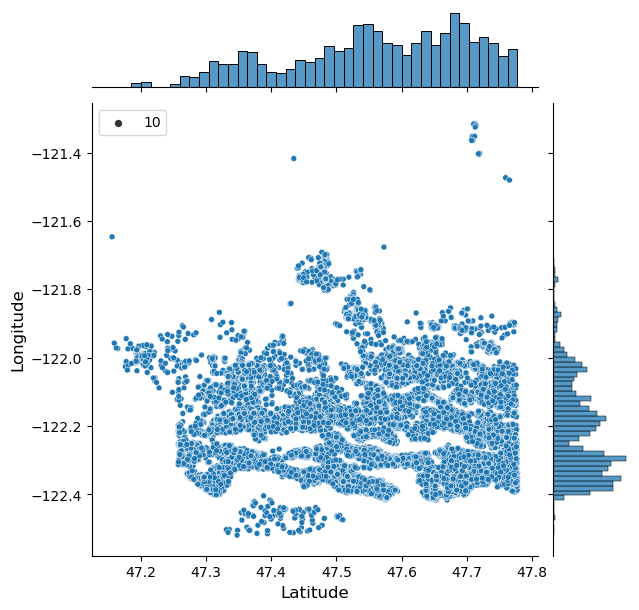

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
sns.despine
plt.show()

Scatter plot helps us to see that more the living area , more the price though data is concentrated towards a particular price zone 

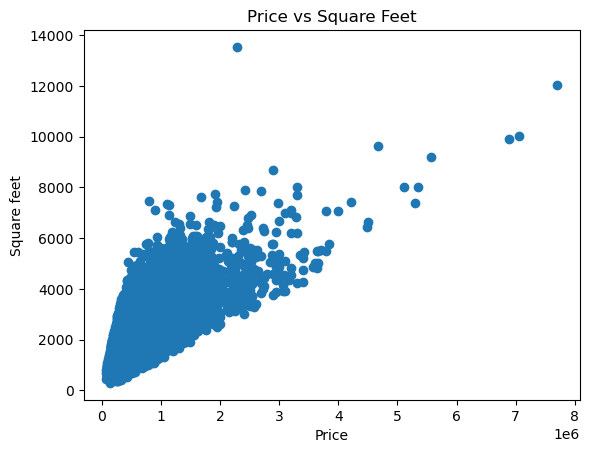

In [12]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel('Price')
plt.ylabel('Square feet')
plt.show()

The second figure tells that longitude of -122.2 to -122.4 sells houses at much higher amount.

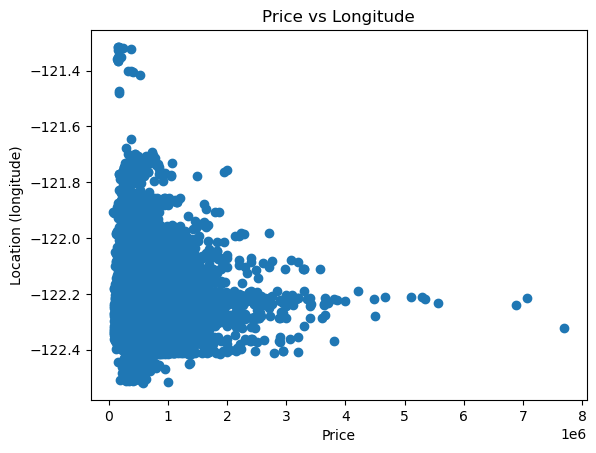

In [13]:
plt.scatter(data.price,data.long)
plt.title("Price vs Longitude")
plt.xlabel('Price')
plt.ylabel('Location (longitude)')
plt.show()

Similarly below figure tells that latitude of 47.8 to 47.5 sells houses at much higher amount.

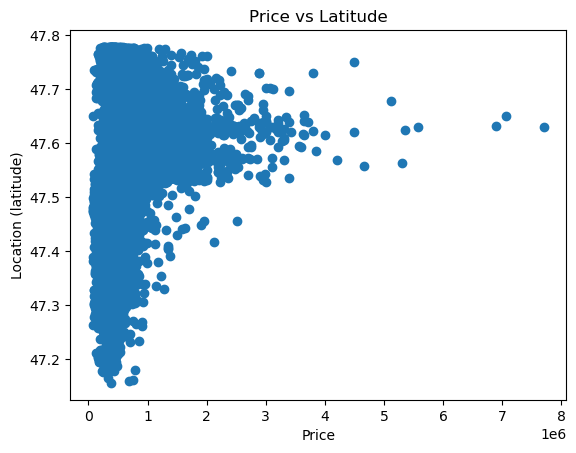

In [14]:
plt.scatter(data.price,data.lat)
plt.title("Price vs Latitude")
plt.xlabel("Price")
plt.ylabel('Location (latitude)')
plt.show()

Similarly other factors are studied using data visualization graphs

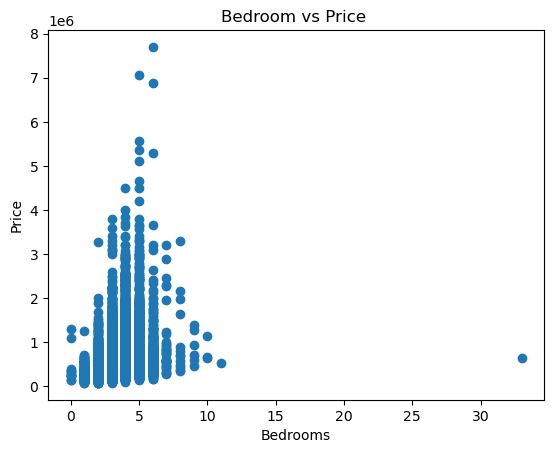

In [15]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom vs Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

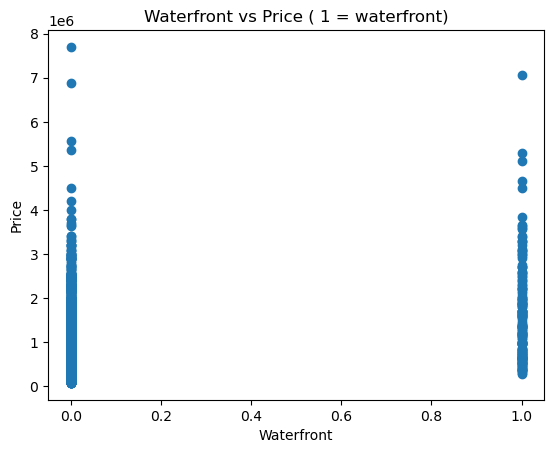

In [16]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 1 = waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

Return new object with labels in requested axis removed.

In [17]:
train = data.drop(['id', 'price'],axis=1)

In [18]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


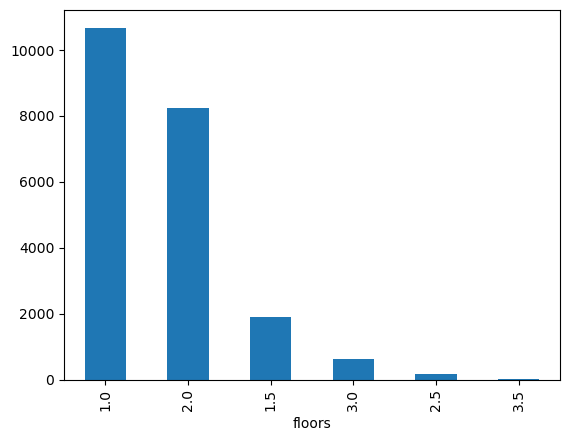

In [19]:
data.floors.value_counts().plot(kind='bar')
plt.show()

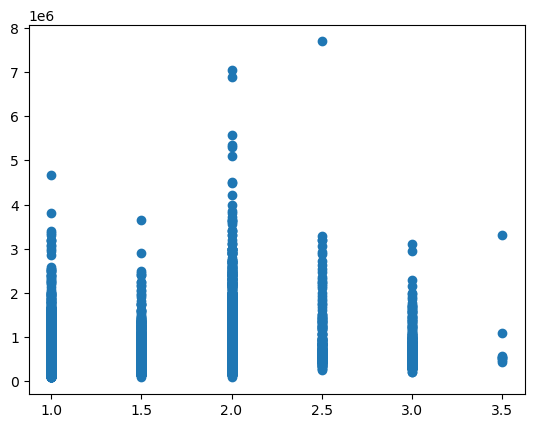

In [20]:
plt.scatter(data.floors,data.price)
plt.show()

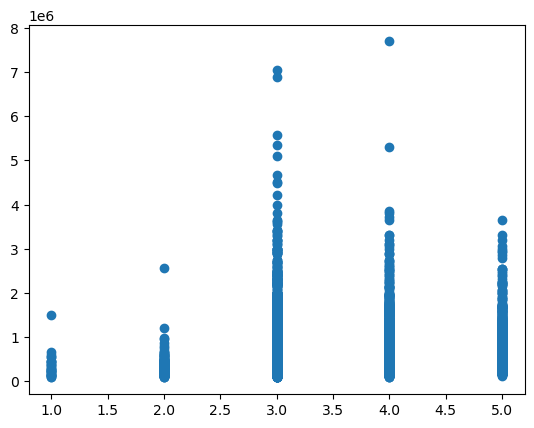

In [21]:
plt.scatter(data.condition,data.price)
plt.show()

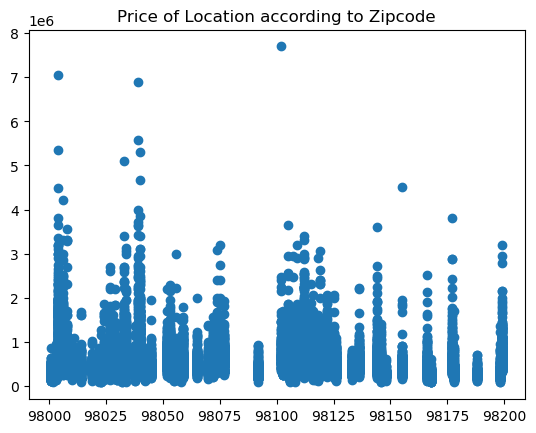

In [22]:
plt.scatter(data.zipcode,data.price)
plt.title("Price of Location according to Zipcode")
plt.show()

There are many factors affecting the prices of the house , like square feet which increases the price of the house and even location influencing the prices of the house.

Now using Linear Regression analysis used to predict the value of a variable based on the value of another variable based on equation y = mx + c

Importing dependencies and initializing Linear Regression to a variable reg.

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

We have to predict the prices hence we set labels (output) as price columns and convert dates to 1’s and 0’s . Using 0 for houses which are new that is built after 2014.

In [24]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

Training data 90% and testing data 10%

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
reg.fit(x_train,y_train)

LinearRegression()

## Using Linear Regression Accuracy or Prediction is 73% 

In [26]:
reg.score(x_test,y_test)

0.7320342760357688

Predicting using another technique Gradient Boosting Regression 

Importing libraries, creating variable and setting the parameters 

In [27]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

In [28]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

## Using Gradient Boosting Regression we get an accuracy of 91%

In [29]:
clf.score(x_test, y_test)

0.9188526398069605

In [30]:
params = {
            'n_estimators' : 400
}
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [31]:
y_pred = reg.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error
t_sc = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    mse = mean_squared_error(y_test, y_pred)
    t_sc.append(mse)

In [33]:
testsc = np.arange((params['n_estimators']))+1

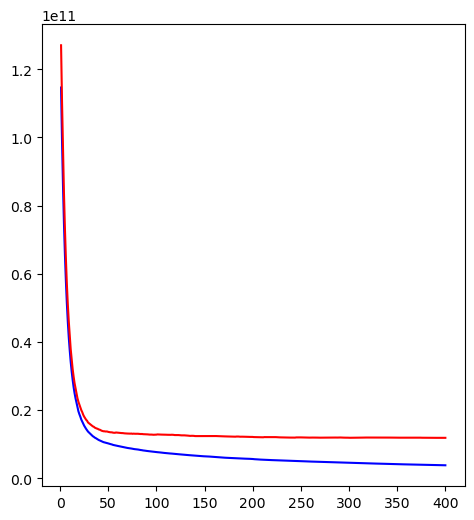

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [35]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scale(train1))

array([[-2.64785461e+00, -4.54699955e-02, -3.16665762e-01, ...,
        -7.94687728e-02,  1.77036441e-16,  0.00000000e+00],
       [-2.34485164e-01,  1.68297114e+00, -7.61521725e-01, ...,
         9.81487761e-01, -7.60361724e-15,  0.00000000e+00],
       [-2.57007792e+00, -6.14344122e-01,  3.49292423e-01, ...,
        -1.38570764e-01,  1.63020172e-14, -0.00000000e+00],
       ...,
       [-2.41985641e+00, -1.10027662e+00, -1.46293798e+00, ...,
         9.66785881e-01,  2.51602138e-17, -0.00000000e+00],
       [ 3.32183025e-01, -1.88043103e+00, -1.04412760e+00, ...,
        -3.97449542e-01,  7.04094567e-18,  0.00000000e+00],
       [-2.43180432e+00, -1.08505981e+00, -1.47248379e+00, ...,
         9.53674385e-01,  4.56105888e-17, -0.00000000e+00]])